In [6]:
import pandas as pd
import glob

files = glob.glob("/workspace/data/preprocessed/part-*.csv")

In [8]:
df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)

/tmp/ipykernel_14921/2287559188.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)


/tmp/ipykernel_14921/2596957001.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assets_1800.sort_index(inplace=True)


<Axes: xlabel='ddate'>

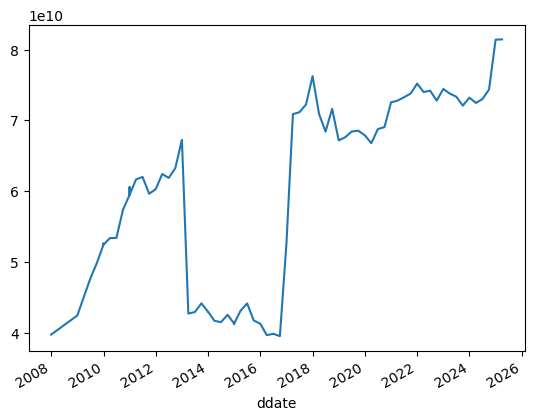

In [15]:
assets_1800 = df.query("cik == 1800 & tag == 'Assets'")
assets_1800.loc[:, "ddate"] = pd.to_datetime(assets_1800["ddate"])
assets_1800.set_index("ddate", inplace=True)
assets_1800.sort_index(inplace=True)

assets_1800["value"].plot()

<Axes: xlabel='ddate'>

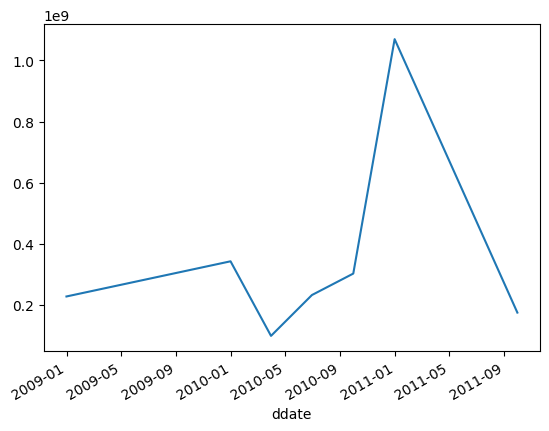

In [22]:
import matplotlib.pyplot as plt

rep_stock_val = financial_statements \
                    .query("cik == 9892 & tag == 'StockRepurchasedDuringPeriodValue'") \
                    .set_index("ddate") \
                    .sort_index()
rep_stock_val["value"].plot()

In [23]:
len(financial_statements)

2562142

In [24]:
len(financial_statements[["cik", "tag", "ddate"]].drop_duplicates())

2562142